In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [204]:
actual = pd.read_csv("../../data/predictions/ACTUAL.csv")
arnn = pd.read_csv("../../data/predictions/arnn_predictions.csv")
reg = pd.read_csv("../../data/predictions/reg_predictions.csv")
mlp = pd.read_csv("../../data/predictions/mlp_predictions.csv")

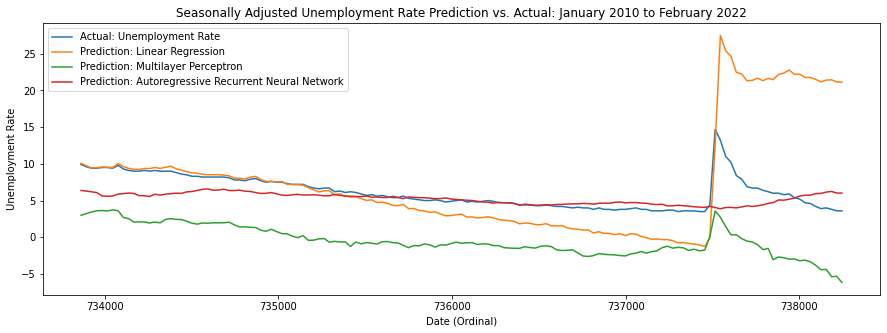

In [205]:
months_df = pd.read_csv("../../data/cleaned/unemp_inputs_test_det.csv").date

plt.figure(figsize=(15, 5))
plt.plot(months_df, actual, label='Actual: Unemployment Rate')
plt.plot(months_df, reg[:145], label='Prediction: Linear Regression')
plt.plot(months_df, mlp[:145], label='Prediction: Multilayer Perceptron')
plt.plot(months_df, arnn[:145], label='Prediction: Autoregressive Recurrent Neural Network')
plt.ylabel('Unemployment Rate')
plt.xlabel('Date (Ordinal)')
plt.title('Figure 1: Unemployment Rate Prediction vs. Actual from January 2010 to February 2022')
plt.legend()
plt.savefig('../../figures/arnn_reg_mlp_prediction_vs_actual.jpg')
plt.show()

In [206]:
arnn_mse = pickle.load(open("../../data/predictions/arnn_mse.txt", "rb"))
mlp_mse = pickle.load(open("../../data/predictions/mlp_mse.txt", "rb"))
reg_mse = pickle.load(open("../../data/predictions/reg_mse.txt", "rb"))


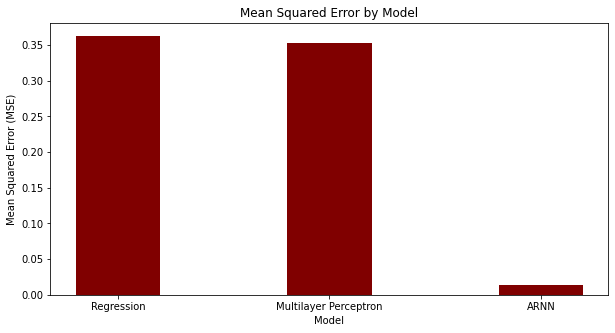

In [207]:
data = {'Regression':float(reg_mse), 'Multilayer Perceptron':float(mlp_mse), 'ARNN': float(arnn_mse)}
model = list(data.keys())
error = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(model, error, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error by Model")
plt.savefig('../../figures/arnn_reg_mlp_mse.jpg')
plt.show()

In [208]:
def covid_mse(series, actual, period):
    if period == "pre":
        series = series[:119]
        actual = actual[:119]
    if period == "post":
        series = series[119:145]
        actual = actual[119:145]

    differences = np.subtract(actual, series)
    squared_differences = np.square(differences)
    return squared_differences.mean()

print(covid_mse(reg, actual, "pre"))
print(covid_mse(reg, actual, "post"))
print(covid_mse(mlp, actual, "pre"))
print(covid_mse(mlp, actual, "post"))
print(covid_mse(arnn, actual, "pre"))
print(covid_mse(arnn, actual, "post"))

0    4.425484
dtype: float64
0    238.178772
dtype: float64
0    39.01858
dtype: float64
0    73.016826
dtype: float64
0    2.628476
dtype: float64
0    14.653949
dtype: float64


        Model   Overall  Pre-COVID  Post-COVID
0  Regression  0.362909   4.425484  238.178772
1         MLP  0.353315  39.018580   73.016826
2        ARNN  0.013429   2.628476   14.653949


<Figure size 720x360 with 0 Axes>

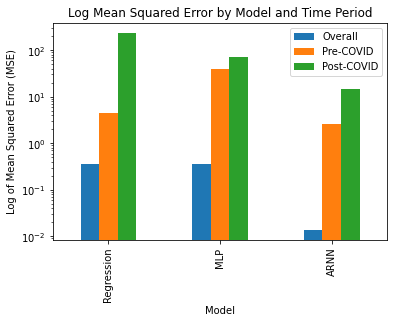

In [209]:
labels = ['Regression', 'Multilayer Perceptron', 'ARNN']
overall_mse = [float(reg_mse), float(mlp_mse), float(arnn_mse)]
pre_covid_mse = [float(covid_mse(reg, actual, "pre")), float(covid_mse(mlp, actual, "pre")), float(covid_mse(arnn, actual, "pre"))]
post_covid_mse = [float(covid_mse(reg, actual, "post")), float(covid_mse(mlp, actual, "post")), float(covid_mse(arnn, actual, "post"))]

df = pd.DataFrame([
        ['Regression', float(reg_mse), float(covid_mse(reg, actual, "pre")), float(covid_mse(reg, actual, "post"))], 
        ['MLP', float(mlp_mse), float(covid_mse(mlp, actual, "pre")), float(covid_mse(mlp, actual, "post"))], 
        ['ARNN', float(arnn_mse), float(covid_mse(arnn, actual, "pre")), float(covid_mse(arnn, actual, "post"))]],
columns=['Model', 'Overall', 'Pre-COVID', 'Post-COVID'])
# view data
print(df)
  
# plot grouped bar chart

fig = plt.figure(figsize = (10, 5))

fig = df.plot(x='Model',
        xlabel = "Model",
        ylabel = "Log of Mean Squared Error (MSE)",
        kind='bar',
        stacked=False,
        title='Figure 2: Log Mean Squared Error by Model and Time Period', logy=True)

fig.figure.savefig('../../figures/arnn_reg_mlp_mse_by_period.jpg')